In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request

In [117]:
df = pd.read_csv('dataset.csv')
df1 = pd.read_csv('Symptom-severity.csv')

In [118]:
df2 = pd.read_csv('symptom_Description.csv')

In [119]:
symptoms = []
for symptom in df1['Symptom'].unique():
    symptoms.append(symptom)

In [120]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [91]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC(probability=True)
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(4182, 17) (738, 17) (4182,) (738,)
['Urinary tract infection' 'Chronic cholestasis' 'Migraine'
 'Urinary tract infection' 'Gastroenteritis'
 'Paralysis (brain hemorrhage)' 'Cervical spondylosis' 'Hepatitis B'
 'Impetigo' 'AIDS' 'Bronchial Asthma' 'Fungal infection' 'Hypertension'
 'Paralysis (brain hemorrhage)' 'Cervical spondylosis'
 'Peptic ulcer diseae' 'Hypoglycemia' 'Chronic cholestasis'
 'Hyperthyroidism' 'Urinary tract infection' 'Hypothyroidism' 'Acne'
 'Hypoglycemia' 'Diabetes' 'GERD' 'Chronic cholestasis'
 'Peptic ulcer diseae' 'Bronchial Asthma' 'GERD' 'Tuberculosis'
 'Peptic ulcer diseae' 'Dimorphic hemmorhoids(piles)' 'Tuberculosis'
 'Chicken pox' 'Hypothyroidism' 'Diabetes' 'Fungal infection'
 'Hypothyroidism' 'Varicose veins' 'Drug Reaction' 'Diabetes'
 'Hepatitis D' 'Hypothyroidism' 'Malaria' 'Paralysis (brain hemorrhage)'
 'Jaundice' 'AIDS' 'Peptic ulcer diseae' 'Jaundice' 'Osteoarthristis'
 'Paralysis (brain hemorrhage)' 'hepatitis A' 'Psoriasis' 'Chicken pox'
 'Diab

F1-score% = 92.52372634268082 | Accuracy% = 92.14092140921409


<AxesSubplot: >

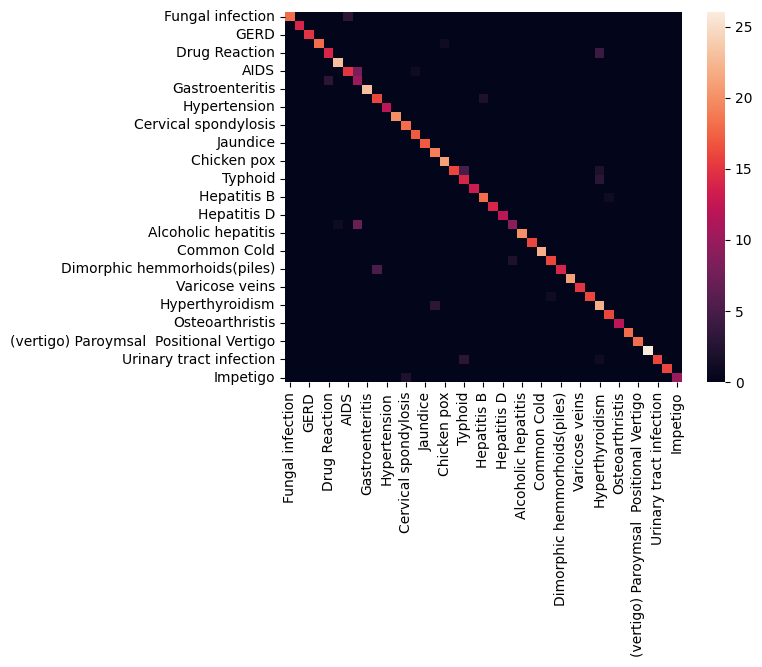

In [92]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [106]:
import pickle
pickle.dump(model, open('model_disease_recognition_V2.pkl', 'wb'))